<a href="https://colab.research.google.com/github/yjliu212/Predict-Beta-Function-Using-Neural-Network/blob/main/Assignment_2b_Beta_Function_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
%cd /content/drive/My\ Drive/Colab\ Notebooks
#!ls  # To list files and verify the location


/content/drive/My Drive/Colab Notebooks


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

      Depth_BML  Temperature        Age       Beta
0             0    40.000000   0.000000   6.600000
1           100    43.471361   0.687166   6.600102
2           200    46.942721   1.374332   6.600232
3           300    50.414082   2.061498   6.600397
4           400    53.885443   2.748664   6.600604
...         ...          ...        ...        ...
7995       7500   324.449947  33.283252  12.000000
7996       7600   328.242613  33.727029  12.000000
7997       7700   332.035279  34.170805  12.000000
7998       7800   335.827945  34.614582  12.000000
7999       7900   339.620610  35.058359  12.000000

[8000 rows x 4 columns]


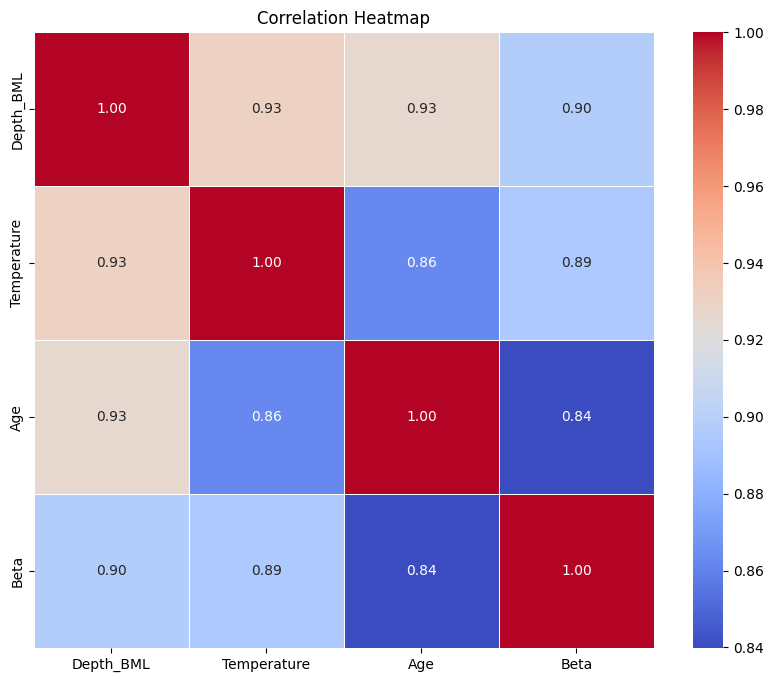

In [38]:
# Create pore pressure data using Dutta's model Eff=Eff0*e^(-VR*Beta), and Issler's eq

# Input ZBML, Temperature, Age, Beta as training data

# Load each CSV file into pandas DataFrames
# df = pd.read_csv('beta_data.csv') # Contains a single Beta function
# df = pd.read_csv('100_beta_data.csv') # Contains 100 Beta function where Tg randomly sampled from 0.01 - 0.02 F/ft
df = pd.read_csv('100_beta_data2.csv') # Contains 100 Beta function where Tg randomly sampled from 0.01 - 0.02 F/ft and Age at end randomly sampled from 30 - 60 my

# Display the first few rows of each DataFrame to verify
print(df)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

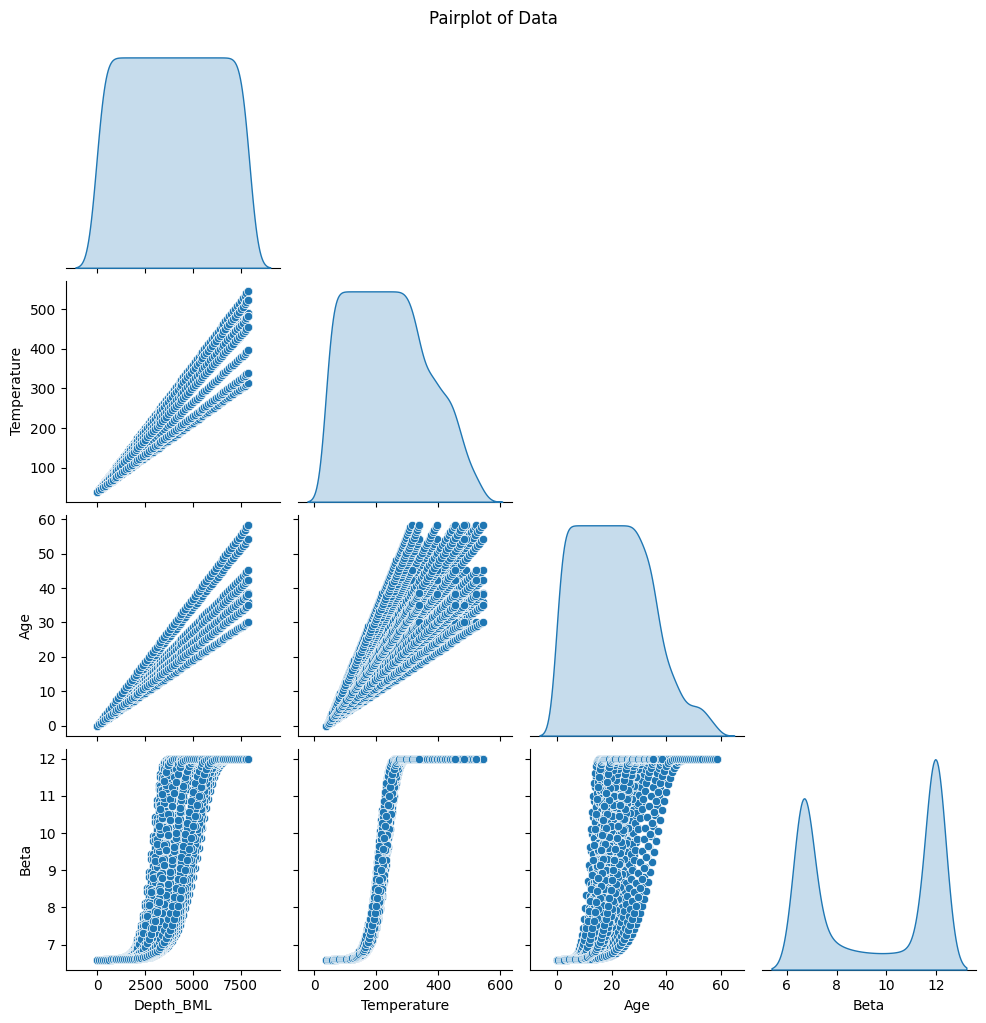

In [39]:
# Pairplot of Data
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Data', y=1.02)
plt.show()


In [40]:
X = df[['Depth_BML', 'Temperature', 'Age']]  # Example features
y = df[['Beta']] # Target variable

X_std=X.copy()
y_std=y.copy()

X_std = (X - X.mean(axis=0)) / X.std(axis=0)
y_std = (y - y.mean(axis=0)) / y.std(axis=0)

In [41]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.3, random_state=42)


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))  # 3 input features
# model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Single output (e.g., porosity)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model (use your dataset here)
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Predict
y_pred = model.predict(X_test)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2596
Epoch 2/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0040
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.2924e-04
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0331e-04
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7285e-04
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3742e-04
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2424e-04
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.1538e-05
Epoch 9/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3561e-05
Epoch 10/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1027e-04
Epoch 11/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0811e-04
Epoch 12/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.2462e-04
Epoch 13/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.6898e-05
Epoch 14/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1446e-04
Epoch 15/50
560/560 

In [43]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.218774920457059e-05


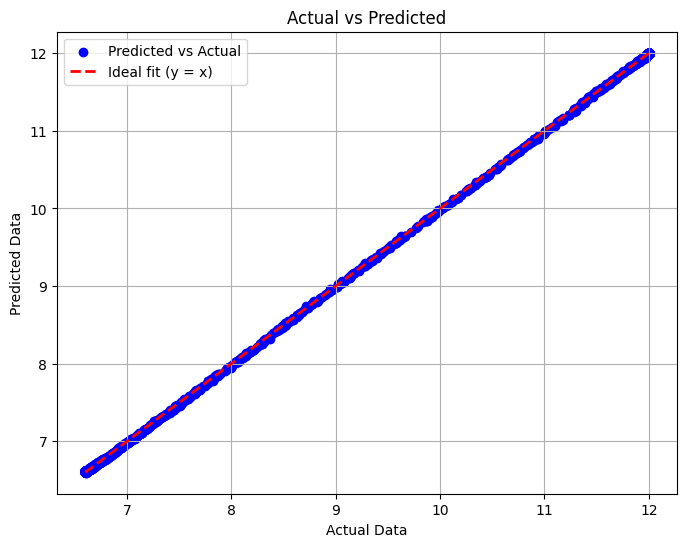

True Beta function:
           Beta
2215  11.999988
2582   7.053759
1662  11.997326
3027  12.000000
4343   6.944128
...         ...
7058   6.723571
7312   6.849203
1471   6.889539
6260   6.628059
6382  11.905200

[2400 rows x 1 columns]
Predicted Beta function:
           Beta
2215  11.992422
2582   7.031785
1662  11.994910
3027  11.992945
4343   6.927976
...         ...
7058   6.734804
7312   6.825156
1471   6.863855
6260   6.629867
6382  11.905615

[2400 rows x 1 columns]


In [44]:

# Assuming y_pred is a 1D array and y_test is a DataFrame
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

X_test=X_test*X.std(axis=0)+X.mean(axis=0)
y_test=y_test*y.std(axis=0)+y.mean(axis=0)
y_pred=y_pred*y.std(axis=0)+y.mean(axis=0)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal fit (y = x)')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

print('True Beta function:')
print(y_test)
print('Predicted Beta function:')
print(y_pred)


[   0.  100.  200. ... 7700. 7800. 7900.]
[ 6.6         6.60010229  6.60023223 ... 12.         12.
 12.        ]


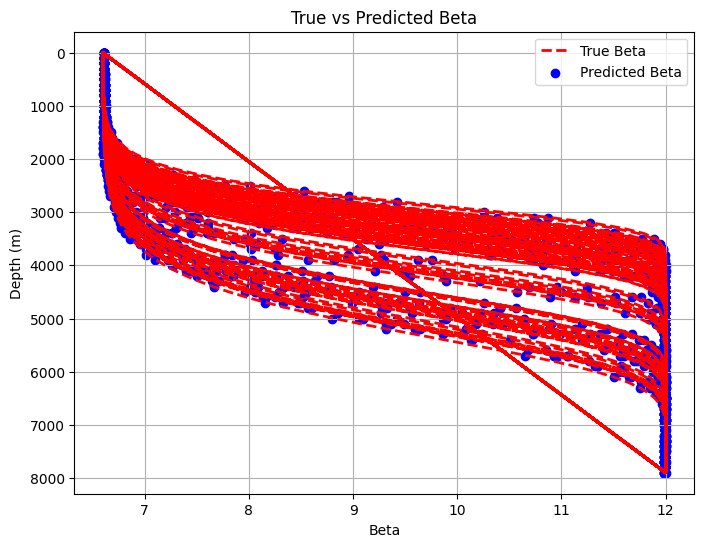

In [45]:
print(X.values[:,0])
print(y.values[:,0])

#print(X_test.values[:,0])
#print(y_test.values[:,0])
#print(y_pred.values[:,0])

plt.figure(figsize=(8, 6))
plt.plot(y.values[:,0],X.values[:,0], 'r--', lw=2,label='True Beta')
#plt.scatter(y_test.values[:,0],X_test.values[:,0])
plt.scatter(y_pred.values[:,0],X_test.values[:,0],color='b',label='Predicted Beta')
plt.gca().invert_yaxis()  # Invert the y-axis to show depth increasing downward
plt.legend()
plt.xlabel('Beta')
plt.ylabel('Depth (m)')
plt.title('True vs Predicted Beta')
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
True Beta function:
         Beta
0    6.600000
1    6.600161
2    6.600381
3    6.600681
4    6.601088
..        ...
75  12.000000
76  12.000000
77  12.000000
78  12.000000
79  12.000000

[80 rows x 1 columns]
Predicted Beta function:
         Beta
0    6.611549
1    6.611087
2    6.610625
3    6.610110
4    6.610814
..        ...
75  12.047256
76  12.048811
77  12.050366
78  12.051921
79  12.053476

[80 rows x 1 columns]


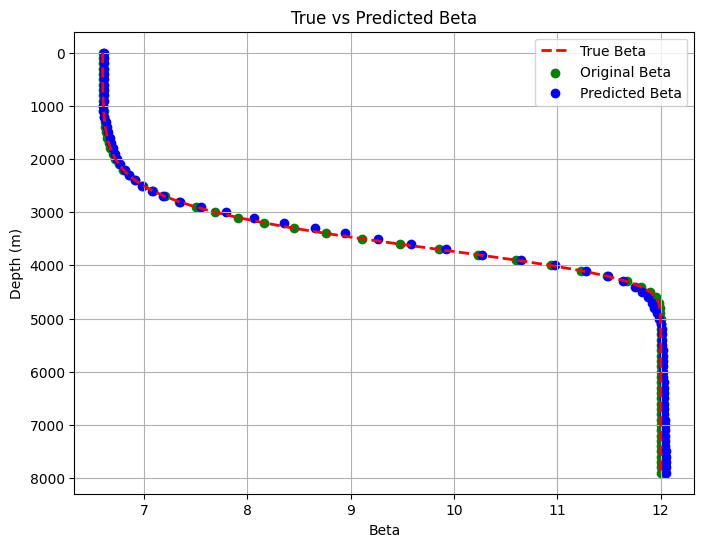

In [46]:
# Verify Neural Network Model using new input data

# Generate new Beta curve using new Temp and Age function
zbml=np.arange(0,8000,100)

tg=0.014 # thermal gradient F/ft, GOM average 0.014-0.016 F/ft
t0=40 # Seafloor temperature F
temp=t0+tg*zbml*3.2808

age=np.interp(zbml,[0,8000],[0,80])

R = 1.987 #cal/K/mol
dE = 19.39e3 #cal/mol (Dutta: 19.3+-0.7 kcal/mol)
A = 4e10 #/million yrs (Dutta: 0.4/yr)
b0=6.6
b1=12

dt = np.diff(age)
dt = np.insert(dt, 0, 0)

Tk=(5/9)*(temp-32)+273.15 # Convert temp from F to K

S = A * np.exp(-dE / R / Tk) * dt
S = np.cumsum(S)
S = 1 * np.exp(-S)

beta=b0*S+b1*(1-S)

#
df1 = pd.DataFrame({
    'Depth_BML': zbml,
    'Temperature': temp,
    'Age': age,
    'Beta': beta
})

X1=df1[['Depth_BML', 'Temperature', 'Age']]
X1_std = (X1 - X.mean(axis=0)) / X.std(axis=0)

y1 = df1[['Beta']] # Target variable
y1_std = (y1 - y.mean(axis=0)) / y.std(axis=0)

# Predict
y1_pred = model.predict(X1_std)

# Assuming y_pred is a 1D array and y_test is a DataFrame
y1_pred = pd.DataFrame(y1_pred, index=y1.index, columns=y1.columns)
y1_pred = y1_pred * y.std(axis=0) + y.mean(axis=0)
y1_orig = y1_std * y.std(axis=0) + y.mean(axis=0)

print('True Beta function:')
print(y1_orig)
print('Predicted Beta function:')
print(y1_pred)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df1.values[:,3],df1.values[:,0], 'r--', lw=2,label='True Beta')
plt.scatter(y1_orig,X1.values[:,0],color='g',label='Original Beta')
plt.scatter(y1_pred,X1.values[:,0],color='b',label='Predicted Beta')
plt.gca().invert_yaxis()  # Invert the y-axis to show depth increasing downward
plt.legend()
plt.xlabel('Beta')
plt.ylabel('Depth (m)')
plt.title('True vs Predicted Beta')
plt.grid(True)
plt.show()